In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e5/sample_submission.csv
/kaggle/input/playground-series-s4e5/train.csv
/kaggle/input/playground-series-s4e5/test.csv
/kaggle/input/flood-prediction-factors/flood.csv


# Input the dataset

Import original dataset

In [2]:
original= pd.read_csv('/kaggle/input/flood-prediction-factors/flood.csv')
original

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3,7,4,7,5,9,4,6,10,4,...,7,3,8,8,6,1,5,4,2,0.535
49996,3,10,3,8,3,3,4,4,3,11,...,8,6,3,6,4,4,2,4,5,0.510
49997,4,4,5,7,2,1,4,5,6,7,...,4,6,4,1,5,1,6,4,3,0.430
49998,4,5,4,4,6,3,10,2,6,11,...,6,3,4,7,6,2,4,0,11,0.515


In [3]:
path = '/kaggle/input/playground-series-s4e5/'
train = pd.read_csv(path + 'train.csv',index_col = ['id'])
test = pd.read_csv(path + 'test.csv',index_col = ['id'])

In [4]:
train

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
id,,,,,,,,,,,,,,,,,,,,,
0,5,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,...,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,...,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,3,3,4,10,4,5,5,7,10,4,...,7,8,7,2,2,1,4,6,4,0.495
1117953,2,2,4,3,9,5,8,1,3,5,...,9,4,4,3,7,4,9,4,5,0.480
1117954,7,3,9,4,6,5,9,1,3,4,...,5,5,5,5,6,5,5,2,4,0.485


In [5]:
test

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
id,,,,,,,,,,,,,,,,,,,,
1117957,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1117958,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
1117959,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
1117960,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
1117961,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863257,5,4,8,3,5,4,4,5,5,5,5,6,1,3,5,6,4,4,6,6
1863258,4,4,2,12,4,3,4,3,5,5,3,7,4,4,3,5,5,3,5,4
1863259,5,7,9,5,5,6,7,5,5,3,6,11,3,11,4,5,9,5,5,4


# Check missing values and duplicate values:

In [6]:
full_train = pd.concat([original,train])
full_train.isnull().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [7]:
test.isnull().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
dtype: int64

In [8]:
full_train.duplicated().sum()

0

In [9]:
test.duplicated().sum()

0

# Define X,y then get overview insight:

In [10]:
X = full_train.drop('FloodProbability',axis=1)
y = full_train[['FloodProbability']]

# Features distribution:

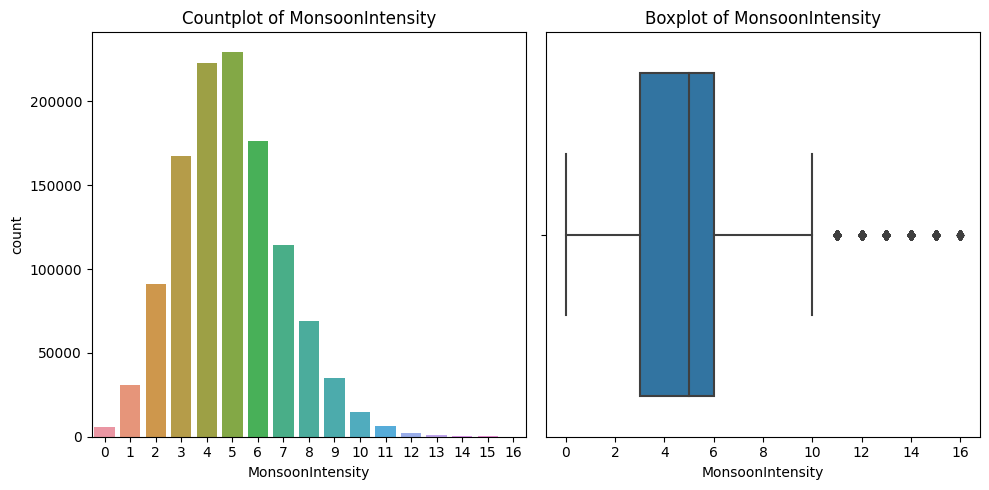

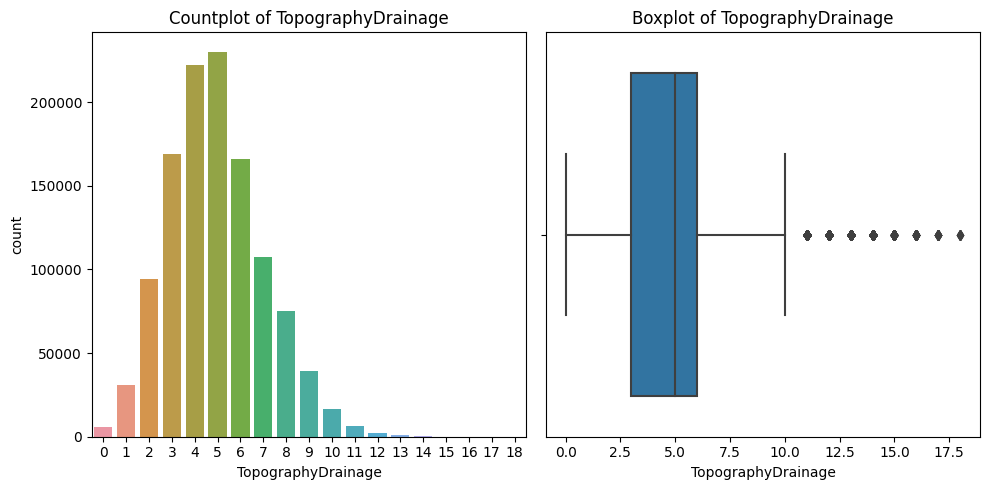

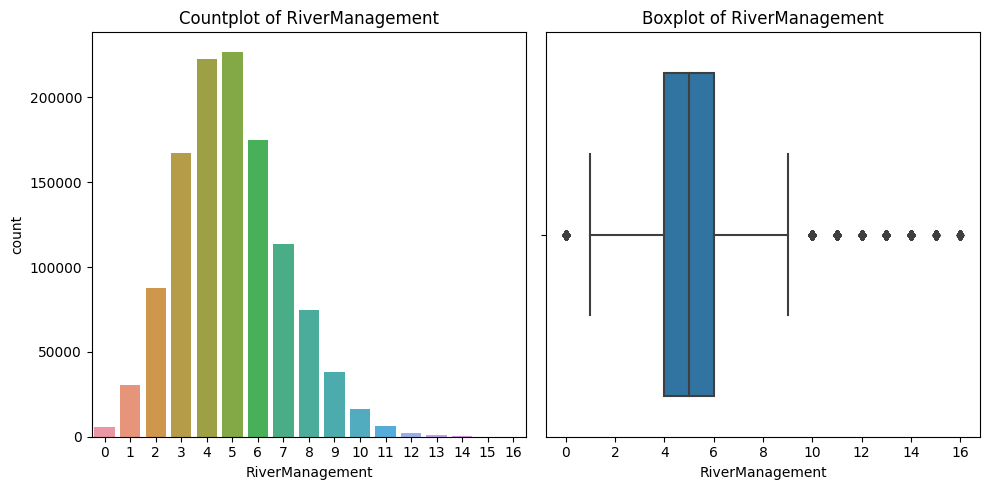

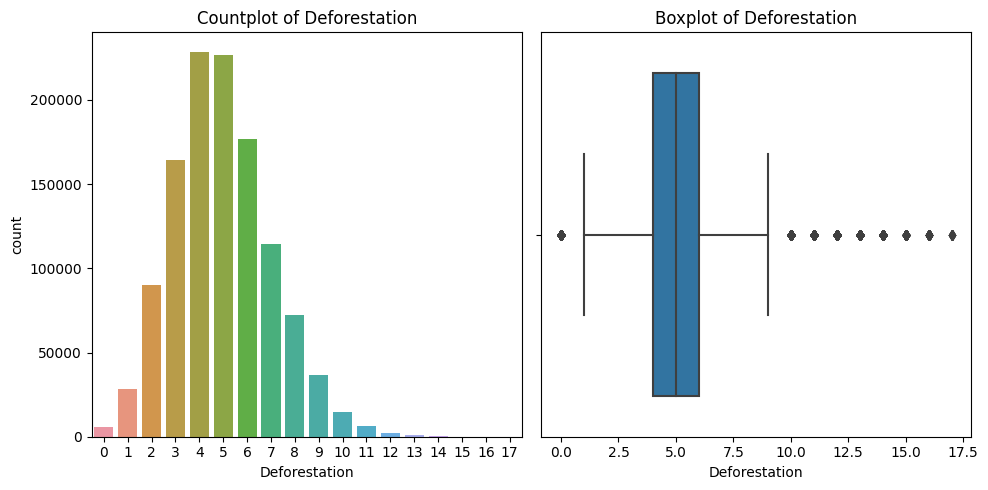

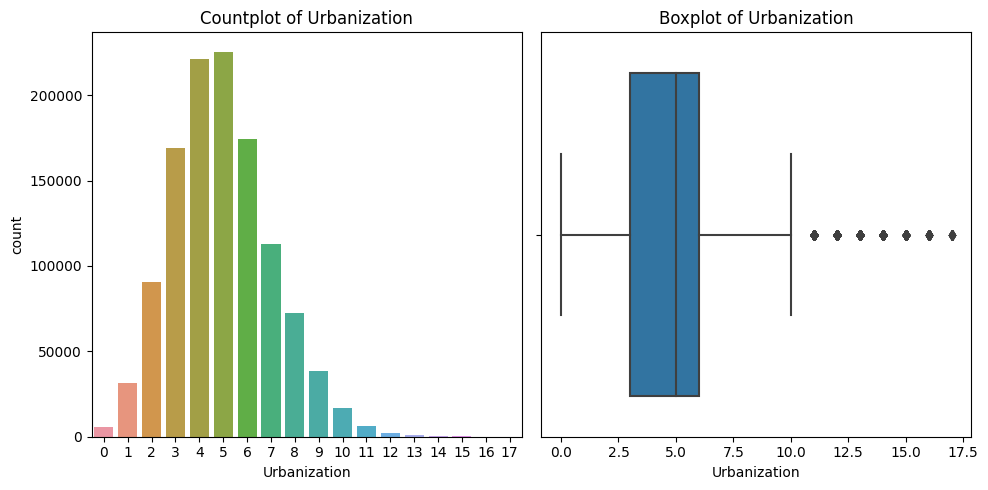

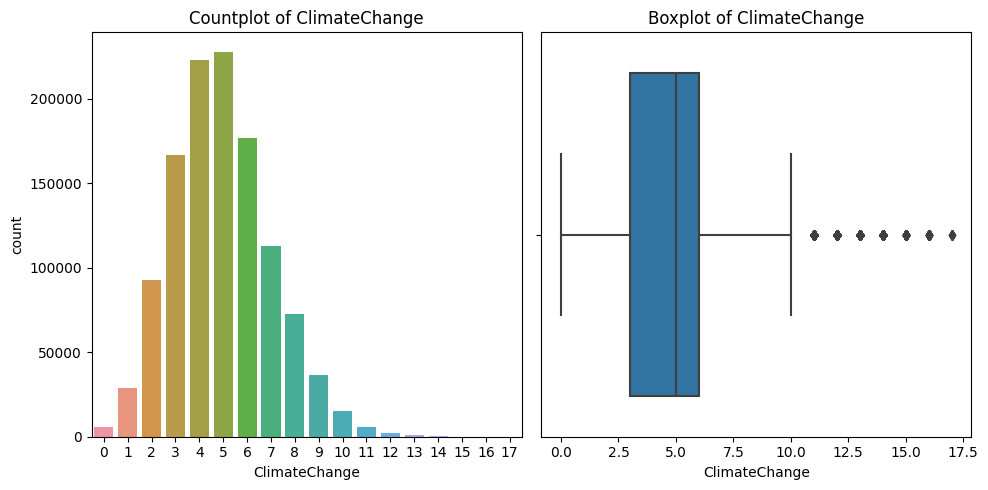

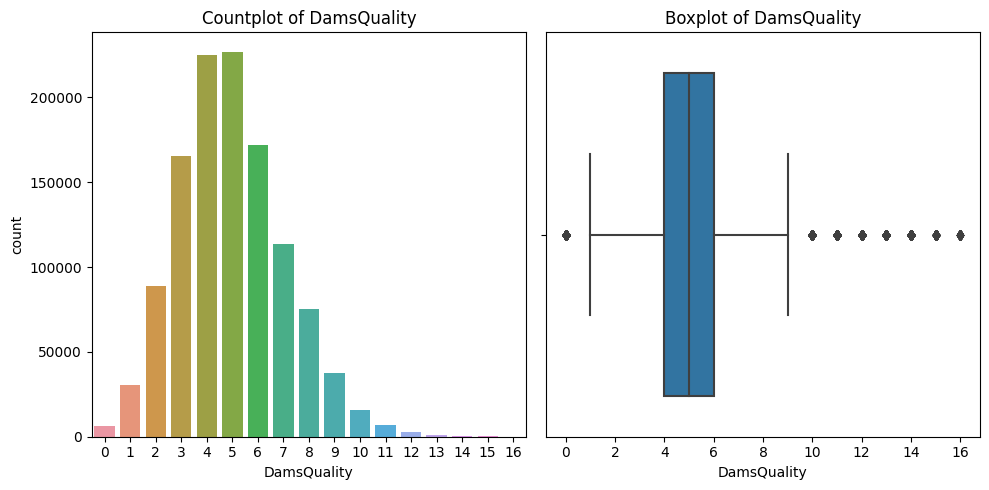

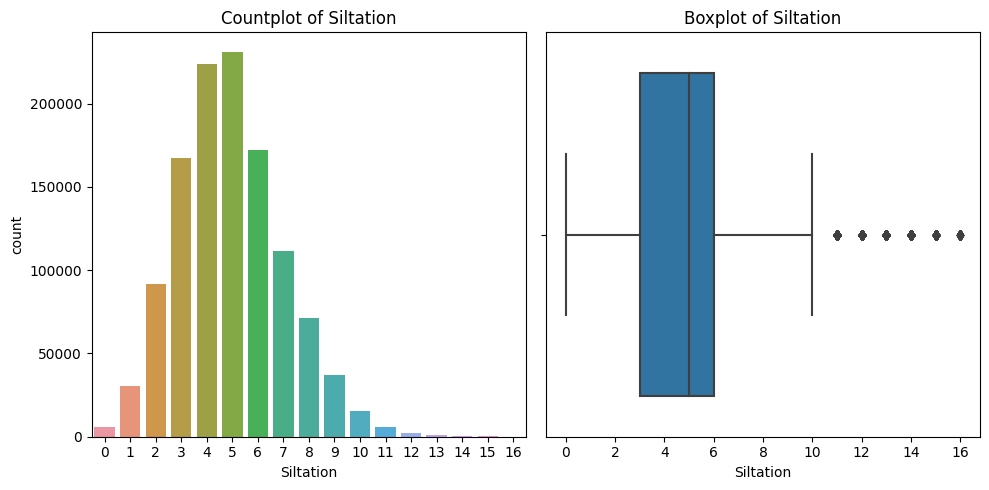

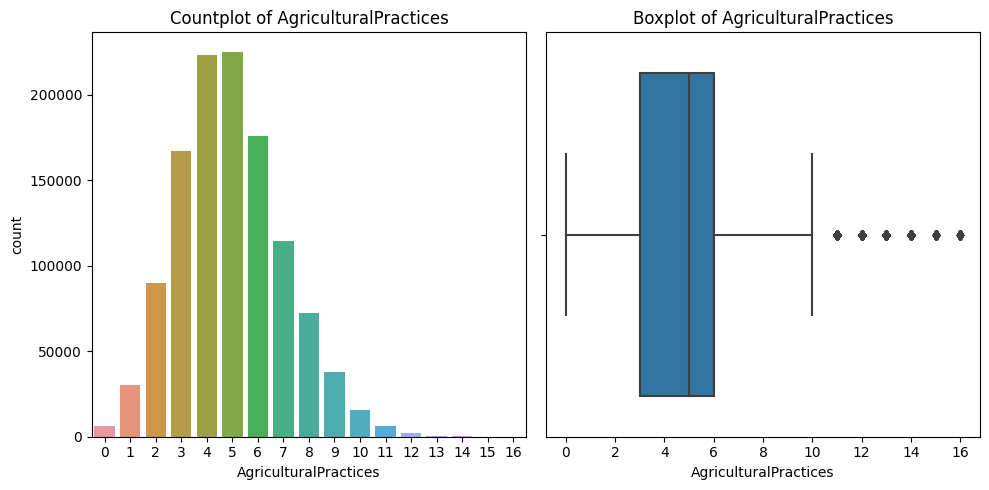

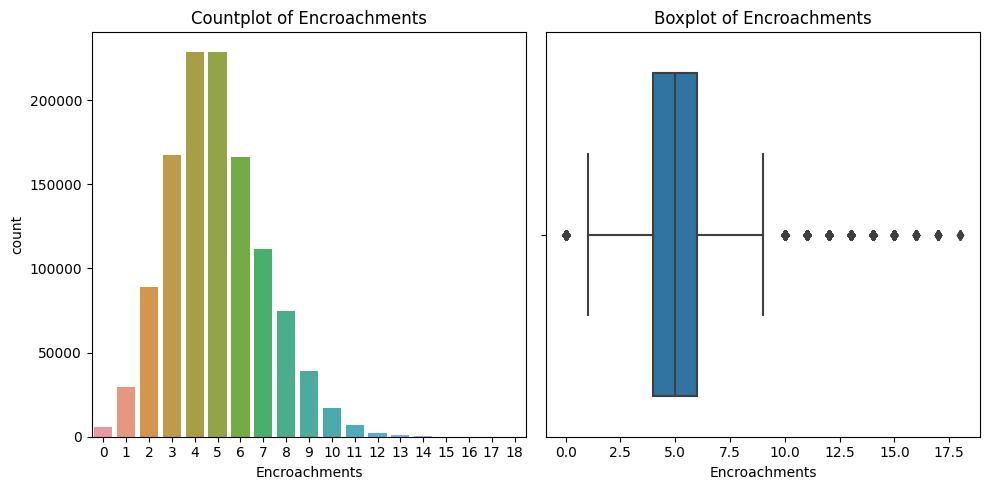

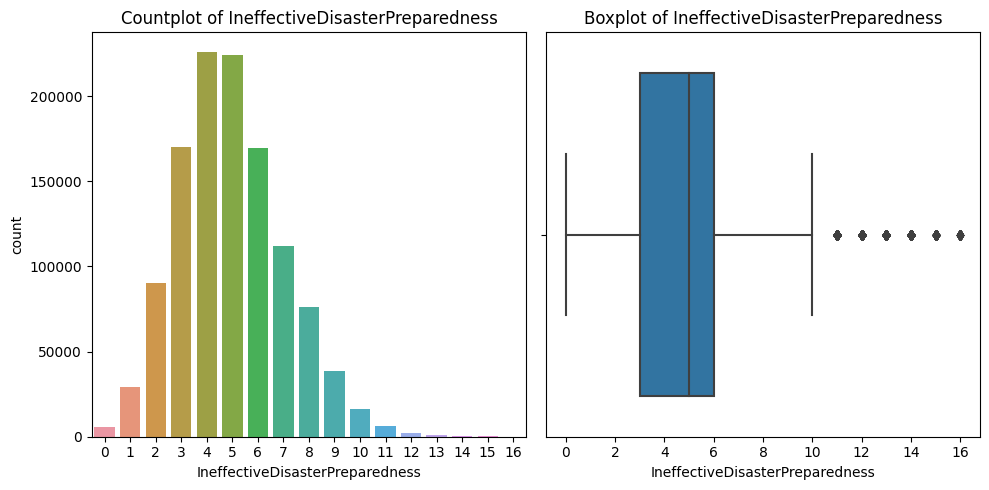

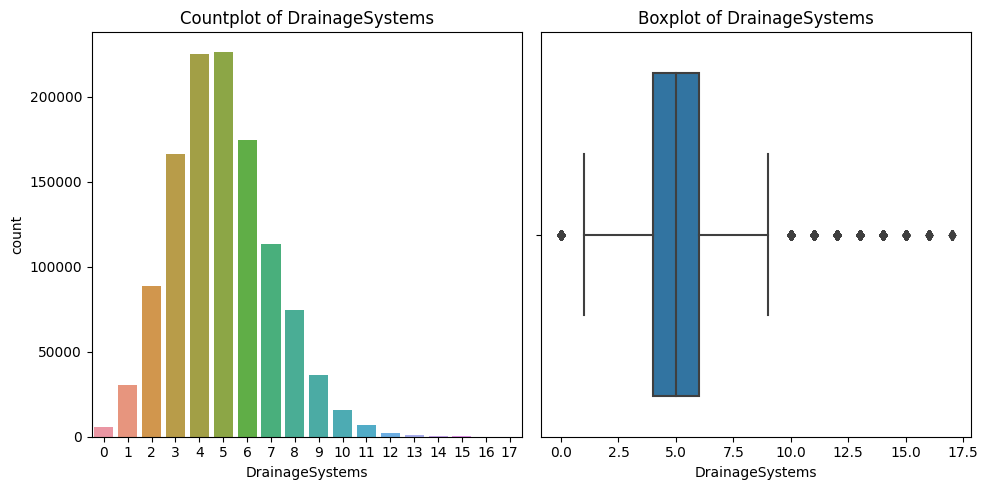

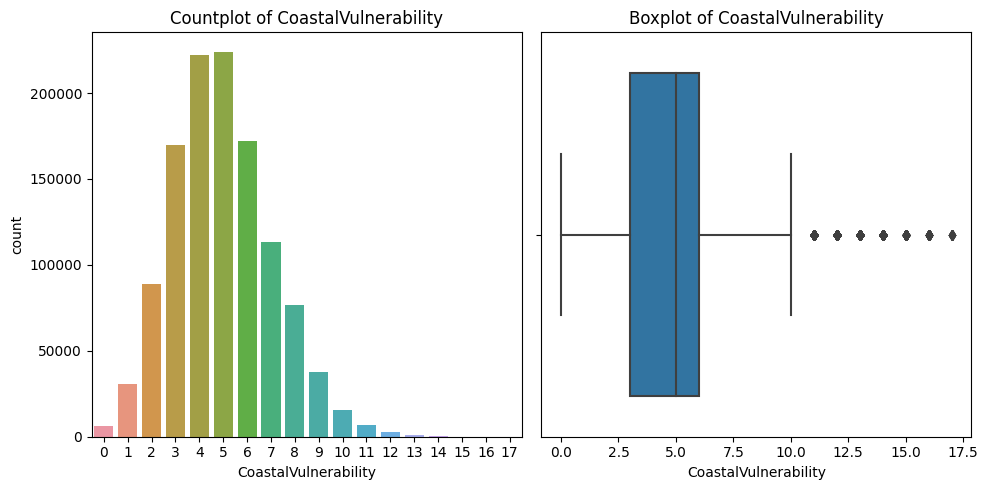

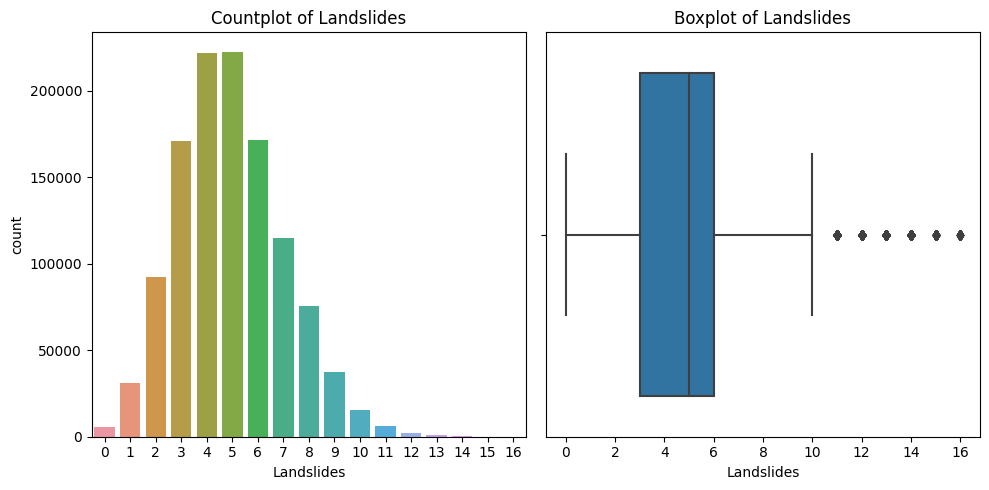

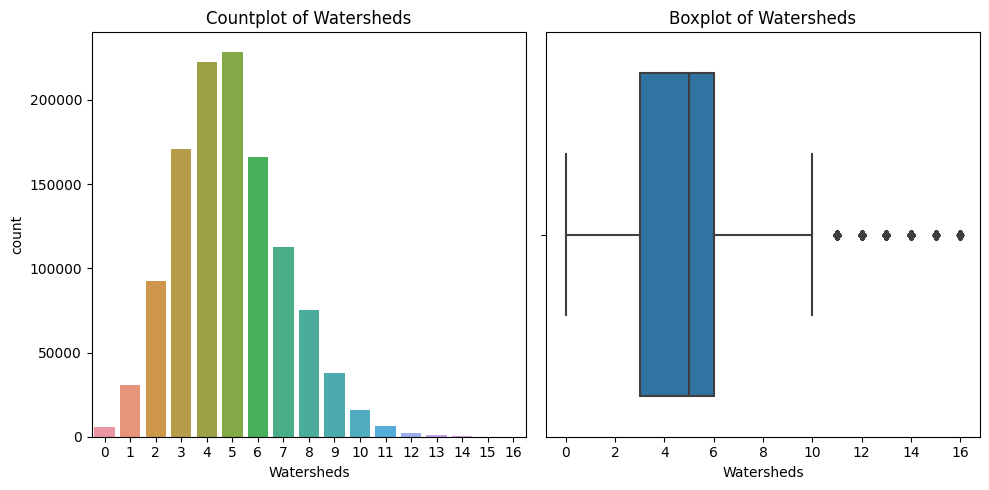

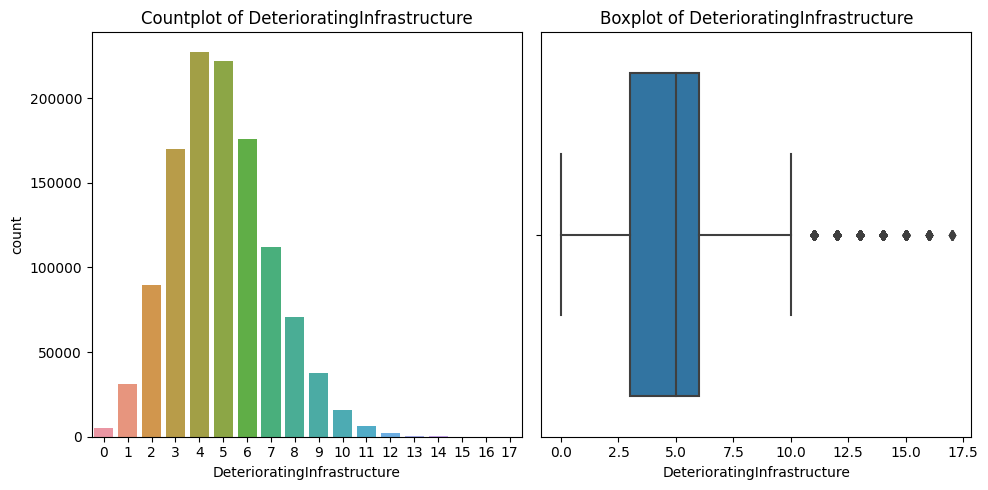

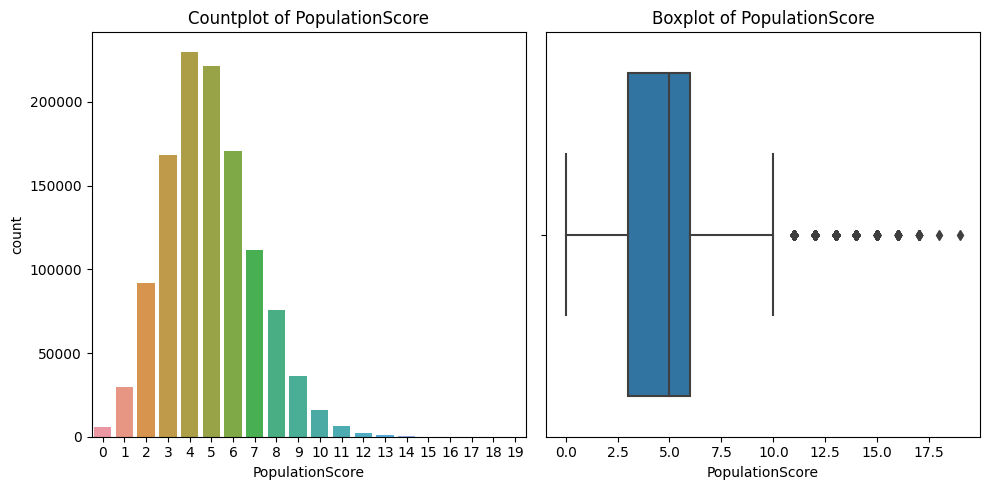

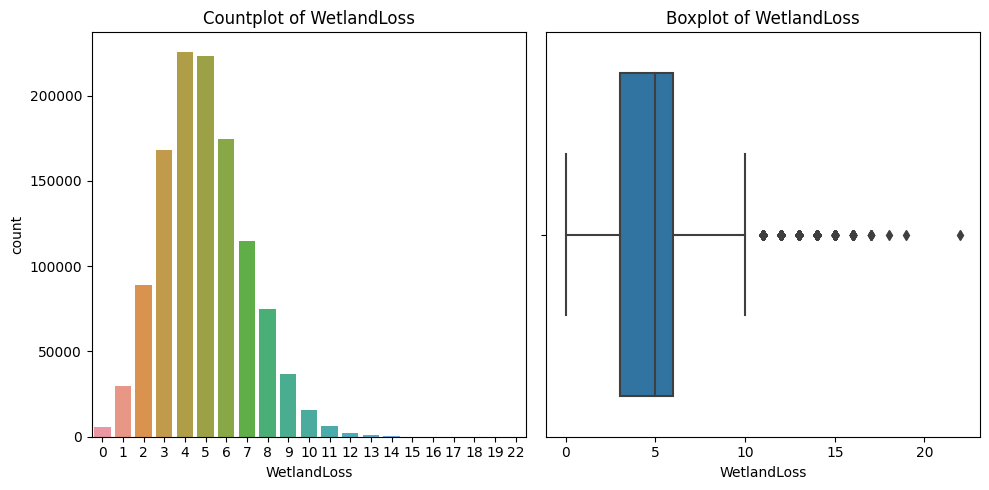

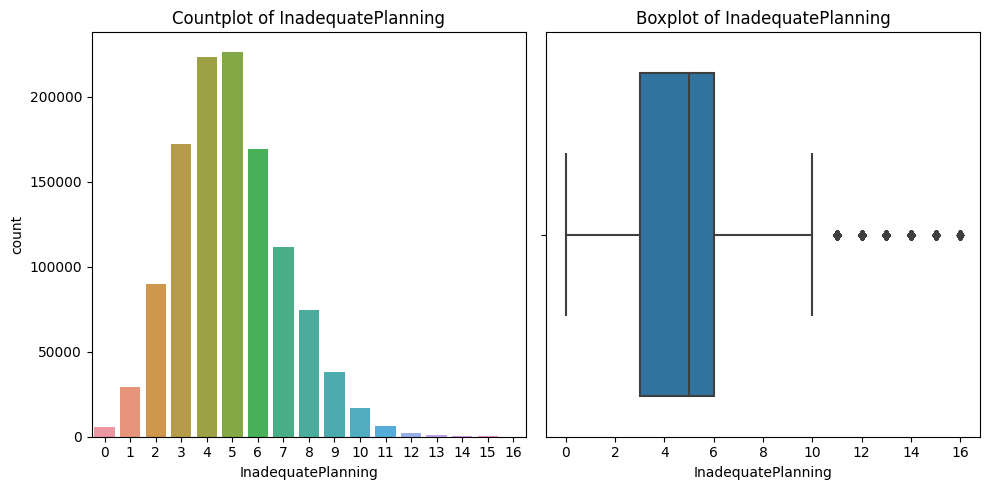

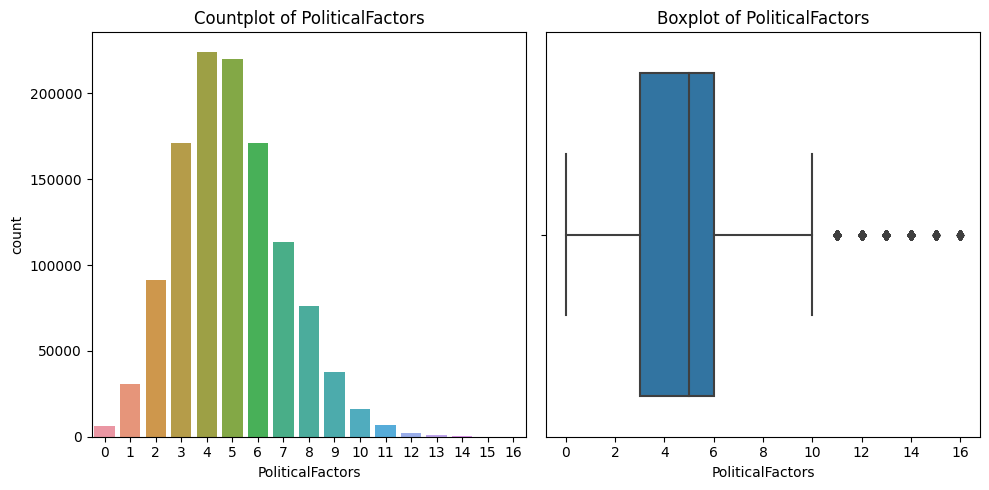

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
for column in X.columns:
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Countplot
    sns.countplot(x=column, data=X, ax=axs[0])
    axs[0].set_title(f'Countplot of {column}')

    # Boxplot
    sns.boxplot(x=column, data=X, ax=axs[1])
    axs[1].set_title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

All columns have right skewed distribution and not much outliers

In [12]:
len(X.columns)

20

In [13]:
X.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')

X have 20 columns.

In [14]:
X.skew()

MonsoonIntensity                   0.444960
TopographyDrainage                 0.459854
RiverManagement                    0.427526
Deforestation                      0.436132
Urbanization                       0.444413
ClimateChange                      0.430920
DamsQuality                        0.442251
Siltation                          0.450559
AgriculturalPractices              0.422150
Encroachments                      0.464027
IneffectiveDisasterPreparedness    0.443909
DrainageSystems                    0.442958
CoastalVulnerability               0.441472
Landslides                         0.425841
Watersheds                         0.452130
DeterioratingInfrastructure        0.444994
PopulationScore                    0.452704
WetlandLoss                        0.438105
InadequatePlanning                 0.455939
PoliticalFactors                   0.438684
dtype: float64

In [15]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,1167957.0,4.924448,2.064482,0.0,3.0,5.0,6.0,16.0
TopographyDrainage,1167957.0,4.929129,2.100671,0.0,3.0,5.0,6.0,18.0
RiverManagement,1167957.0,4.957917,2.079283,0.0,4.0,5.0,6.0,16.0
Deforestation,1167957.0,4.945076,2.059346,0.0,4.0,5.0,6.0,17.0
Urbanization,1167957.0,4.944509,2.090501,0.0,3.0,5.0,6.0,17.0
ClimateChange,1167957.0,4.936415,2.065289,0.0,3.0,5.0,6.0,17.0
DamsQuality,1167957.0,4.958424,2.090286,0.0,4.0,5.0,6.0,16.0
Siltation,1167957.0,4.930394,2.073436,0.0,3.0,5.0,6.0,16.0
AgriculturalPractices,1167957.0,4.945338,2.075964,0.0,3.0,5.0,6.0,16.0
Encroachments,1167957.0,4.951676,2.090378,0.0,4.0,5.0,6.0,18.0


# Target distribution:

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='FloodProbability', ylabel='Density'>

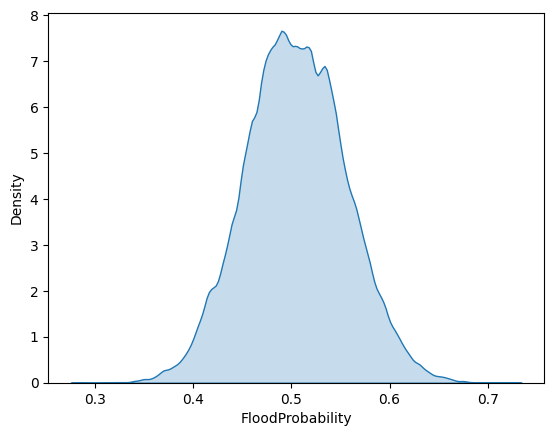

In [16]:
sns.kdeplot(x='FloodProbability',data=y,fill=True)

while the target column have the normal distribution.

In [17]:
y.skew()

FloodProbability    0.049566
dtype: float64

# Correlation on features:

In [18]:
X.corr()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
MonsoonIntensity,1.000000,-0.007130,-0.007516,-0.007113,-0.008561,-0.007295,-0.007220,-0.007563,-0.007642,-0.009943,-0.007477,-0.009197,-0.010326,-0.008748,-0.008863,-0.007932,-0.008387,-0.006139,-0.007543,-0.007751
TopographyDrainage,-0.007130,1.000000,-0.009281,-0.007988,-0.009983,-0.009227,-0.007421,-0.008781,-0.009218,-0.012580,-0.010124,-0.009608,-0.011921,-0.009810,-0.010238,-0.006087,-0.009962,-0.009559,-0.010762,-0.011315
RiverManagement,-0.007516,-0.009281,1.000000,-0.007872,-0.012135,-0.008391,-0.007867,-0.009544,-0.010033,-0.010554,-0.009809,-0.010578,-0.011084,-0.008735,-0.010818,-0.005472,-0.006430,-0.009441,-0.009149,-0.011263
Deforestation,-0.007113,-0.007988,-0.007872,1.000000,-0.012173,-0.007793,-0.008890,-0.010964,-0.009353,-0.012659,-0.008890,-0.009983,-0.011894,-0.008507,-0.010004,-0.008485,-0.011148,-0.010459,-0.009929,-0.009089
Urbanization,-0.008561,-0.009983,-0.012135,-0.012173,1.000000,-0.010249,-0.010539,-0.009687,-0.010078,-0.010788,-0.011973,-0.012185,-0.013806,-0.010072,-0.011661,-0.009893,-0.010786,-0.009800,-0.011034,-0.012462
ClimateChange,-0.007295,-0.009227,-0.008391,-0.007793,-0.010249,1.000000,-0.008122,-0.008880,-0.011078,-0.011879,-0.011024,-0.009517,-0.012410,-0.008829,-0.009219,-0.005814,-0.010203,-0.008909,-0.010222,-0.011010
DamsQuality,-0.007220,-0.007421,-0.007867,-0.008890,-0.010539,-0.008122,1.000000,-0.008741,-0.008464,-0.010240,-0.009069,-0.009683,-0.011942,-0.009386,-0.008349,-0.009507,-0.008753,-0.008910,-0.010710,-0.012324
Siltation,-0.007563,-0.008781,-0.009544,-0.010964,-0.009687,-0.008880,-0.008741,1.000000,-0.009831,-0.010062,-0.008584,-0.010548,-0.011330,-0.008782,-0.008780,-0.005812,-0.008396,-0.007814,-0.008014,-0.008123
AgriculturalPractices,-0.007642,-0.009218,-0.010033,-0.009353,-0.010078,-0.011078,-0.008464,-0.009831,1.000000,-0.011929,-0.010031,-0.010239,-0.011006,-0.009864,-0.009168,-0.008077,-0.008396,-0.011189,-0.009982,-0.010639
Encroachments,-0.009943,-0.012580,-0.010554,-0.012659,-0.010788,-0.011879,-0.010240,-0.010062,-0.011929,1.000000,-0.011508,-0.011663,-0.015705,-0.010864,-0.012670,-0.009719,-0.009897,-0.009541,-0.011481,-0.011620


<Axes: >

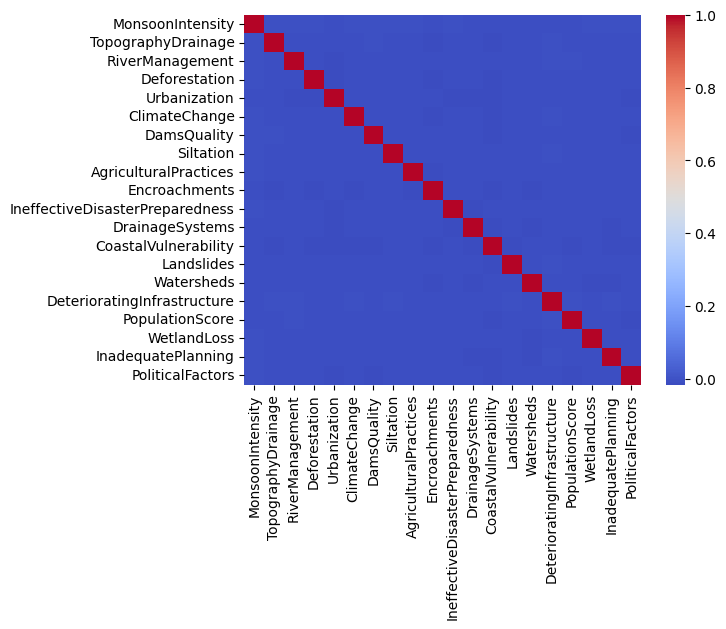

In [19]:
sns.heatmap(X.corr(),cmap='coolwarm')

> This can help identify multicollinearity issues, where two or more variables are highly correlated, which can affect the performance of certain models, especially linear models like linear regression.
> 
> Once you've assessed the correlations, if you find high correlations among several features, you might consider using Principal Component Analysis (PCA)

> High Feature Correlation: If the correlation matrix reveals significant correlations (absolute values > 0.7 or < -0.7) between many features, PCA can help reduce dimensionality by capturing the variance in these correlated features into a smaller set of uncorrelated components. This can improve the performance of machine learning models that struggle with highly correlated features.

# Data modelling:

1. Train test split
1. PowerTransformer
1. Scaling

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 512)

In [21]:
pt = PowerTransformer(method='yeo-johnson')
X_train_power = pt.fit_transform(X_train)
X_test_power = pt.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_power)
X_test_scaled = scaler.transform(X_test_power)

# Linear Regression:

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train_scaled,y_train)

LinearRegression()

# Predict the test set - Calculate R2 score:

In [23]:
from sklearn.metrics import r2_score
lr_predict = lr.predict(X_test_scaled)

r2_score(y_test,lr_predict)

0.8372359778875118

# Create the submission file:

In [24]:
submit = pd.read_csv('/kaggle/input/playground-series-s4e5/sample_submission.csv')
test_pt = pt.transform(test)
test_scale = scaler.transform(test_pt)

submit['FloodProbability'] = lr.predict(test_scale)
submit.to_csv('submission.csv', index=False)